In [25]:
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import sklearn as sklearn
df = pd.read_csv('crop.csv')

In [26]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [27]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [28]:
#finding the null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [29]:
#finding the duplicates
df.duplicated().sum()

0

In [30]:
#finding the the garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10) 

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64
******************************


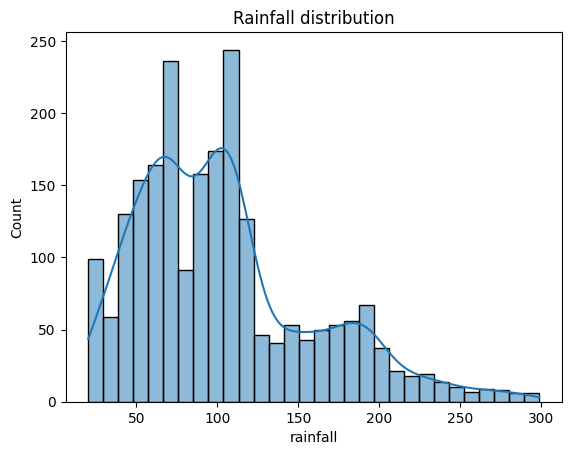

In [31]:
#Data visualization
#Rainfall distribution using  histogram
sbn.histplot(df['rainfall'], bins=30, kde=True)
plt.title('Rainfall distribution')
plt.show()

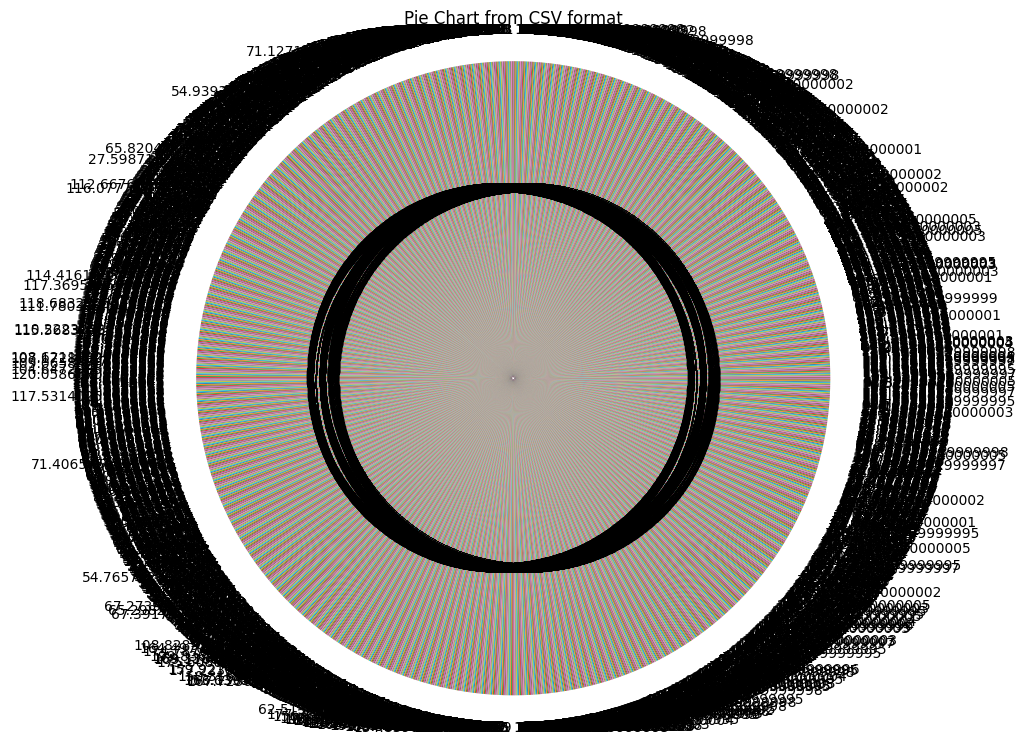

In [32]:
#Group by rainfall and count the occurrences
rainfall_counts=df['rainfall'].value_counts()
#Data visualization
#Rainfall distribution using  Pie chart
#plt.title('Rainfall distributions')
#plt.axis('equal')#Equal aspect ratio ensures that pie is drawn as a circle.
#plt.show()
#create the pie chart
plt.figure(figsize=(9,9))
plt.pie(rainfall_counts, labels=rainfall_counts.index, autopct='%1.1f%%',  startangle=140)
plt.title('Pie Chart from CSV format')
plt.axis('equal')
plt.show()



<Axes: >

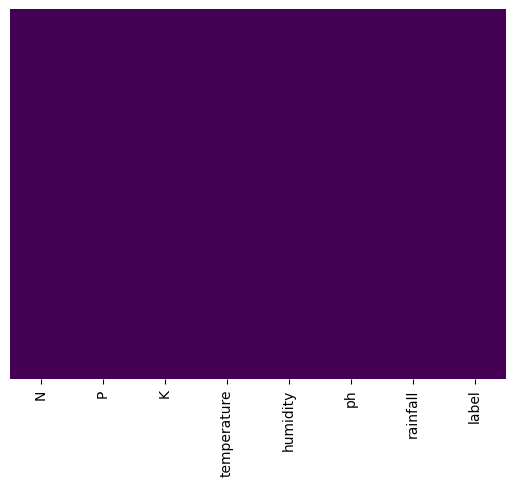

In [33]:
#check for null or missing values using a heatmap
sbn.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [34]:
#visualization correlation
c=df.label.astype('category')
targets=dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
x=df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

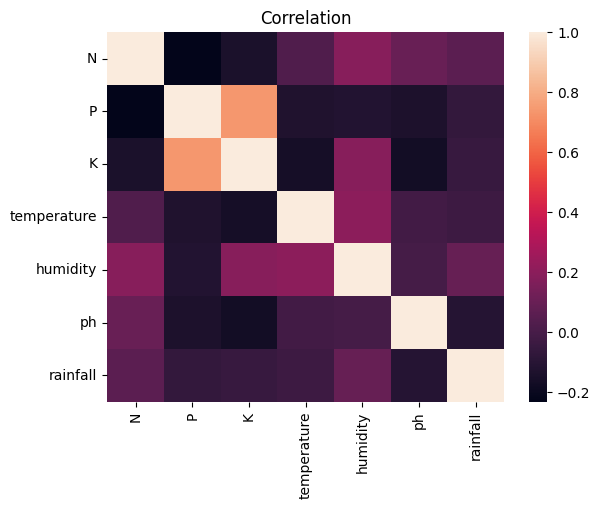

In [35]:
#create correlation visualization
sbn.heatmap(x.corr())
plt.title("Correlation")
plt.show()

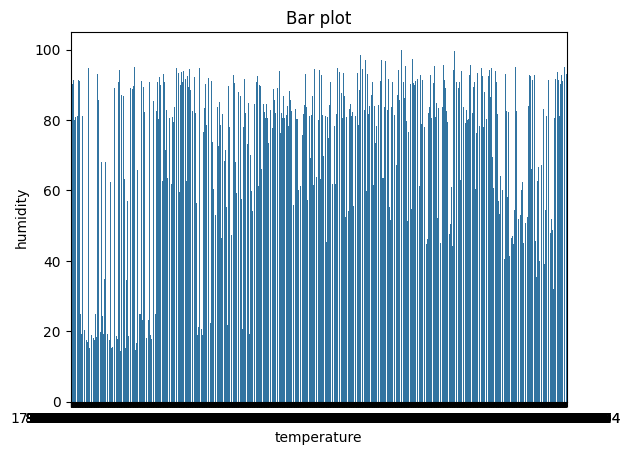

In [36]:
#Data visualization using the bar plot
sbn.barplot(x='temperature', y='humidity', data=df)
plt.title("Bar plot") 
plt.show()

In [37]:
#Machine learning models, set train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#split the dataset into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=1)

#future scaling
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)

x_test_scaled=scaler.fit_transform(x_test)

In [38]:
#selection of model, KNN, Confusion Matrix, Random Forest, SVC(outdated version), decision trees
#predict using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn=KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
knn.score(x_test_scaled, y_test)

0.9681818181818181

<Axes: >

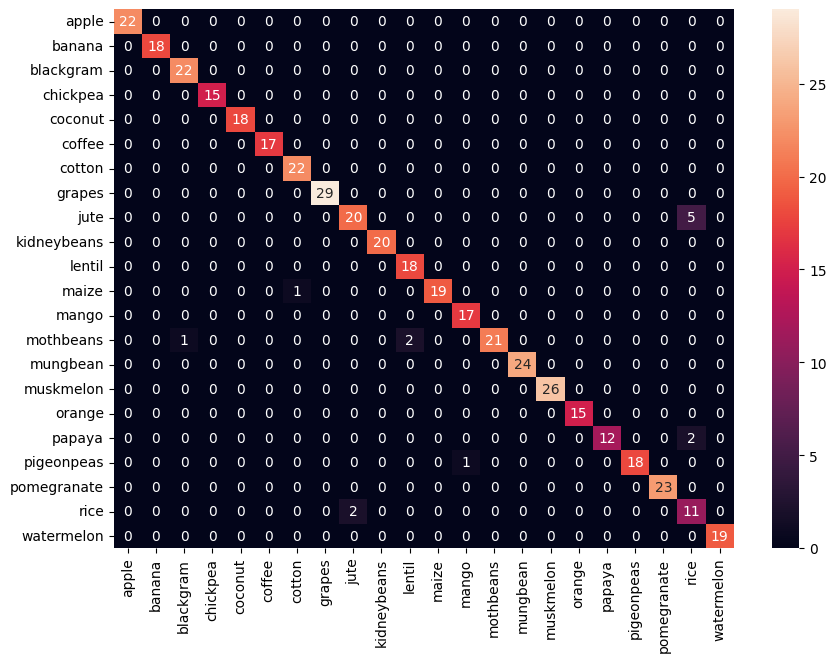

In [39]:
#confusion matrix
from sklearn.metrics import confusion_matrix

mat=confusion_matrix(y_test, knn.predict(x_test_scaled))
df_cm=pd.DataFrame(mat, index=[i for i in targets.values()], columns=[i for i in targets.values()])
plt.figure(figsize=(10,7))
sbn.heatmap(df_cm, annot=True)

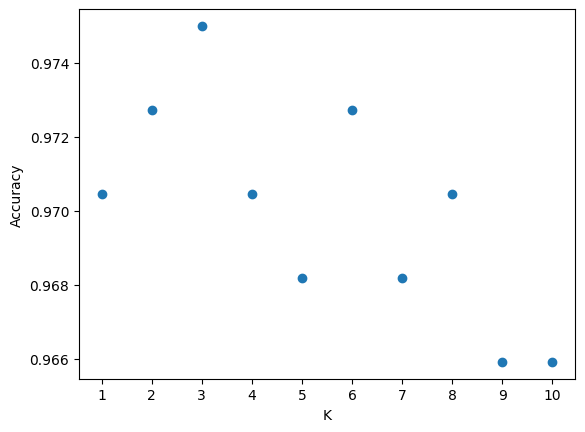

In [40]:
k_range=range(1,11)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    scores.append(knn.score(x_test_scaled, y_test))

plt.figure()
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.scatter(k_range, scores)
plt.xticks([i for i in range(1,11)])
plt.show()

In [41]:
#Classification using support vector classifier
from sklearn.svm import SVC

svc_linear=SVC(kernel='linear')
svc_linear.fit(x_train_scaled, y_train)
svc_linear.score(x_test_scaled, y_test)
print("linear Kernel Accuracy: ", svc_linear.score(x_test_scaled, y_test))

svc_linear=SVC(kernel='poly')
svc_linear.fit(x_train_scaled, y_train)
svc_linear.score(x_test_scaled, y_test)
print("Poly Kernel Accuracy: ", svc_linear.score(x_test_scaled, y_test))

svc_linear=SVC(kernel='rbf')
svc_linear.fit(x_train_scaled, y_train)
svc_linear.score(x_test_scaled, y_test)
print("RBF Kernel Accuracy: ", svc_linear.score(x_test_scaled, y_test))

linear Kernel Accuracy:  0.9704545454545455
Poly Kernel Accuracy:  0.9840909090909091
RBF Kernel Accuracy:  0.9818181818181818


In [42]:
#classify using the decision tree
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)
dt.score(x_test_scaled, y_test)


0.9704545454545455

In [43]:
#classification using random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_scaled, y_train)
rf.score(x_test_scaled, y_test)

0.9795454545454545

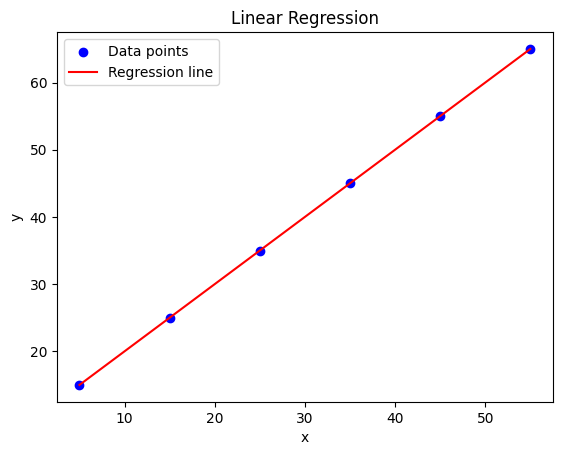

In [45]:
#Machine Learning
#you can split data into three categories
# Numerical, categorical and ordinal 

#Linear regression
x=[5,15,25,35,45,55]
y=[15,25,35,45,55,65]

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 25, 35, 45, 55, 65])

# Create a linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict y values
y_pred = model.predict(x)

# Plot the data points
plt.scatter(x, y, color='blue', label='Data points')

# Plot the linear regression line
plt.plot(x, y_pred, color='red', label='Regression line')

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()
